In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import random
from math import sqrt
#create df_all variable

df_all = pd.read_csv('nuresed.csv', low_memory=False)
def get_duplicate_long_latitude():
    duplicate_data = df_all[df_all.duplicated(subset=['latitude', 'longitude'], keep=False)]
    #filepath = Path('duplicate_nuresed1-fUS01.csv')  
    #duplicate_data.to_csv(filepath) 
    return duplicate_data 

In [2]:
def get_diff_value_by_latitude(latitude):
    Sample_dup = get_duplicate_long_latitude()
    new_df = Sample_dup.loc[Sample_dup ['latitude'] == latitude]
    return new_df

In [3]:
#declare varaiable for function
dup_df = get_duplicate_long_latitude()
#declare variable for the random range
rand_index = random.randrange(len(dup_df))
get_random_row = dup_df.iloc[[rand_index]]
duplicate_row_by_latitude = get_diff_value_by_latitude(get_random_row['latitude'].values[0])
column_array = ['strdpthc',
    'strwdthc',
    'latitude', 
    'longitude',
    'wtrlevel',
    'weather',
    'wtrtemp',
    'ph',
    'cond',
    'alk',
    'sedtype',
    'sedcolr',
    'strflowc',
    'wtrcolr',
    'sampdat',
                
]

df_new_data = duplicate_row_by_latitude[column_array]
different_column = [
    'latitude', 
    'longitude',
    
    
]
for i in df_new_data:
    value1 = (df_new_data.iloc[[0][0]][i])
    value2 = (df_new_data.iloc[[1][0]][i])
    if str(value1) != "nan" and str(value2) != "nan":
        if value1 != value2:
            different_column.append(i)
print(duplicate_row_by_latitude[different_column])    

        latitude  longitude
207538    32.567  -111.1981
207539    32.567  -111.1981


In [4]:
def get_chemical_names(first_chemical_name, second_chemical_name):
    chemicals_col_ppm = dup_df.filter(like=first_chemical_name).columns
    pct_column = dup_df.filter(like=second_chemical_name).columns
    chemicals_col = chemicals_col_ppm.append(pct_column)
    return chemicals_col

In [5]:
def negative_number(integer_data):
    return integer_data/1.414
    
    

In [6]:
dup_df = get_duplicate_long_latitude()

#dup_df['u_xx_ppm'] = np.abs(dup_df['u_xx_ppm'])
chemical_col = get_chemical_names('ppm', 'pct')


for column in chemical_col:
    index =0
    for each in dup_df[column]:
        if str(each) != 'nan':
            if each < 0 :
                new_value = negative_number(np.abs(dup_df.iloc[index,dup_df.columns.get_loc(column)]))
                dup_df.iloc[index,dup_df.columns.get_loc(column)] = new_value

        index += 1
   # print(chemical_col)




C:\Users\sharmila\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
#dup_df = get_duplicate_long_latitude()
#first_dup = dup_df.loc[dup_df['latitude']==45.0936]
#value_count = dup_df["latitude"].value_counts()


unique_doelab = dup_df['doelab'].unique()
#print(unique_doelab)

lasl = dup_df.loc[dup_df['doelab'] == unique_doelab[0]]
LLL = dup_df.loc[dup_df['doelab'] == unique_doelab[1]]
SRL_W = dup_df.loc[dup_df['doelab'] == unique_doelab[2]]
ORGDP = dup_df.loc[dup_df['doelab'] == unique_doelab[3]]
SRL_E = dup_df.loc[dup_df['doelab'] == unique_doelab[4]]
data = []

In [8]:
def get_value(location, valuetype):
    chemicals_col_ppm = dup_df.filter(like='ppm').columns
    pct_column = dup_df.filter(like='pct').columns
    chemicals_col = chemicals_col_ppm.append(pct_column)
    
    data2=[]
    for each in chemicals_col:
        df_get = f"{location}[[each]].{valuetype}()"
        df_value= eval(df_get)
        data2.append([location,each,df_value[0]])
    df2 = pd.DataFrame(data2, columns = ['location','chemical_name', f"values-{valuetype}"])
    return df2
   





In [18]:
df = get_value("lasl","mean")
#print(df.count())
#print(df.head(30))
df


,location,chemical_name,values-mean
0,lasl,u_xx_ppm,3.667722
1,lasl,u_dn_ppm,5.244336
2,lasl,u_fl_ppm,NaN
3,lasl,u_ms_ppm,NaN
4,lasl,u_na_ppm,NaN
...,...,...,...
56,lasl,ca_pct,1.694994
57,lasl,fe_pct,3.494339
58,lasl,k_pct,1.563363
59,lasl,mg_pct,1.275426


In [12]:
df = get_value("lasl","median")
#print(df.count())
#
#print(df.head(30))
df

,location,chemical_name,values-median
0,lasl,u_xx_ppm,2.85000
1,lasl,u_dn_ppm,3.12000
2,lasl,u_fl_ppm,NaN
3,lasl,u_ms_ppm,NaN
4,lasl,u_na_ppm,NaN
...,...,...,...
56,lasl,ca_pct,1.15800
57,lasl,fe_pct,2.84400
58,lasl,k_pct,1.47000
59,lasl,mg_pct,1.08025


In [13]:
df2= ({'mean':[  3.667722 ,   8.408918,  1110.927852, 17.938635
 ],
           'median':[2.85000, 7.000000,  517.000000, 7.000000,   
],
           'column_name': ['u_xx_ppm', 'as_pp', 'mn_ppm', ' pb_ppm']})
df3 = pd.DataFrame(df2)

df3

,mean,median,column_name
0,3.667722,2.85,u_xx_ppm
1,8.408918,7.00,as_pp
2,1110.927852,517.00,mn_ppm
3,17.938635,7.00,pb_ppm


<AxesSubplot:>

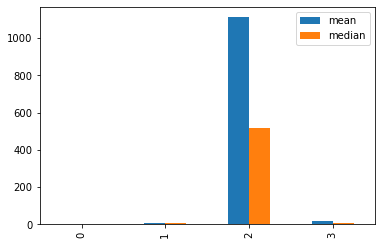

In [17]:
df3.plot.bar()


<AxesSubplot:ylabel='Frequency'>

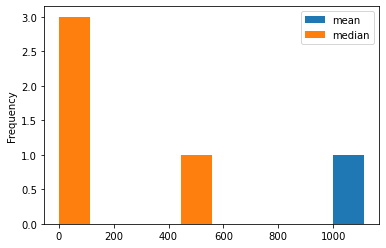

In [15]:
df3.plot.hist()

